<h2> Exploratory Data Analysis </h2>

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# Paths to the image directories
train_directory = 'datasets/archive-3/train/images'
test_directory = 'datasets/archive-3/test/images'
validation_directory = 'datasets/archive-3/valid/images'

In [4]:
# Function to load images from a directory
def load_images_from_directory(directory):
    image_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith(('png', 'jpg', 'jpeg'))]
    images = []
    for image_file in image_files:  # Load all images
        images.append(Image.open(image_file))
    return images

In [5]:
# Plot a grid of 10 images
def plot_image_grid(images, title):
    # Select 10 images for the grid
    if len(images) > 10:
        images = images[:10]
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows, 5 columns
    fig.suptitle(title)
    axes = axes.ravel()
    for i in range(10):
        if i < len(images):
            axes[i].imshow(images[i])
            axes[i].axis('off')
        else:
            axes[i].axis('off')
    plt.tight_layout()
    plt.show()


In [6]:
# Load images from each dataset
train_images = load_images_from_directory(train_directory)
test_images = load_images_from_directory(test_directory)
validation_images = load_images_from_directory(validation_directory)

# Display basic statistics for each dataset
print(f"Total number of training images: {len(train_images)}")
print(f"Total number of testing images: {len(test_images)}")
print(f"Total number of validation images: {len(validation_images)}")

Total number of training images: 5805
Total number of testing images: 279
Total number of validation images: 549


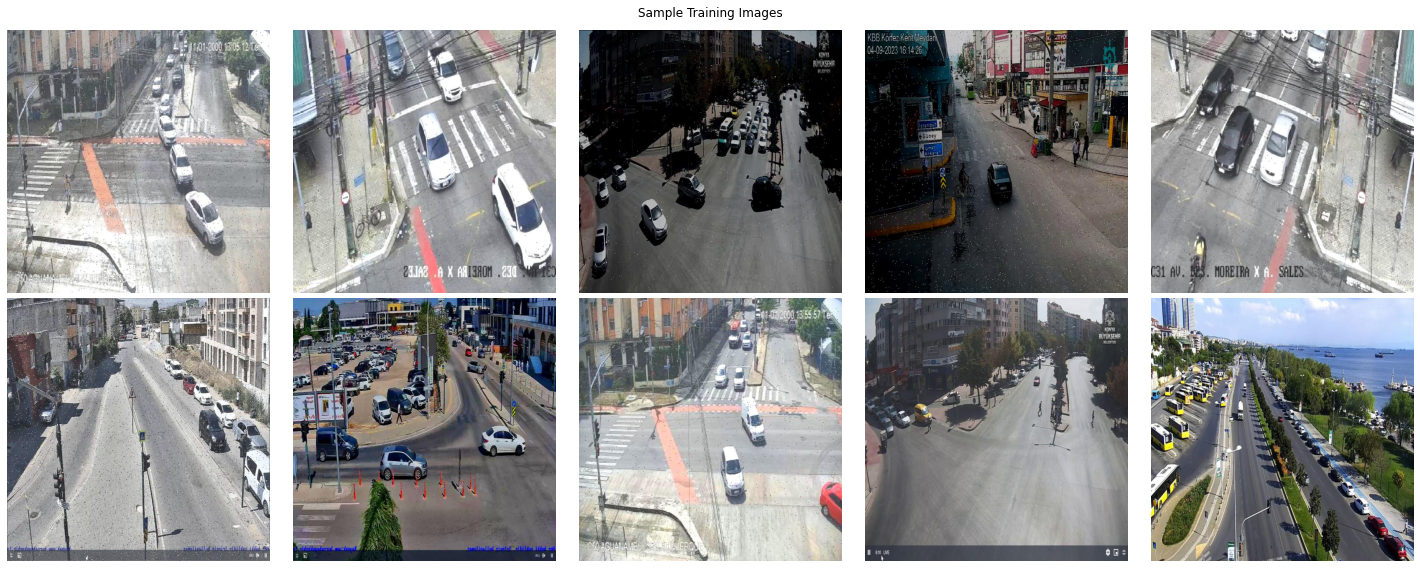

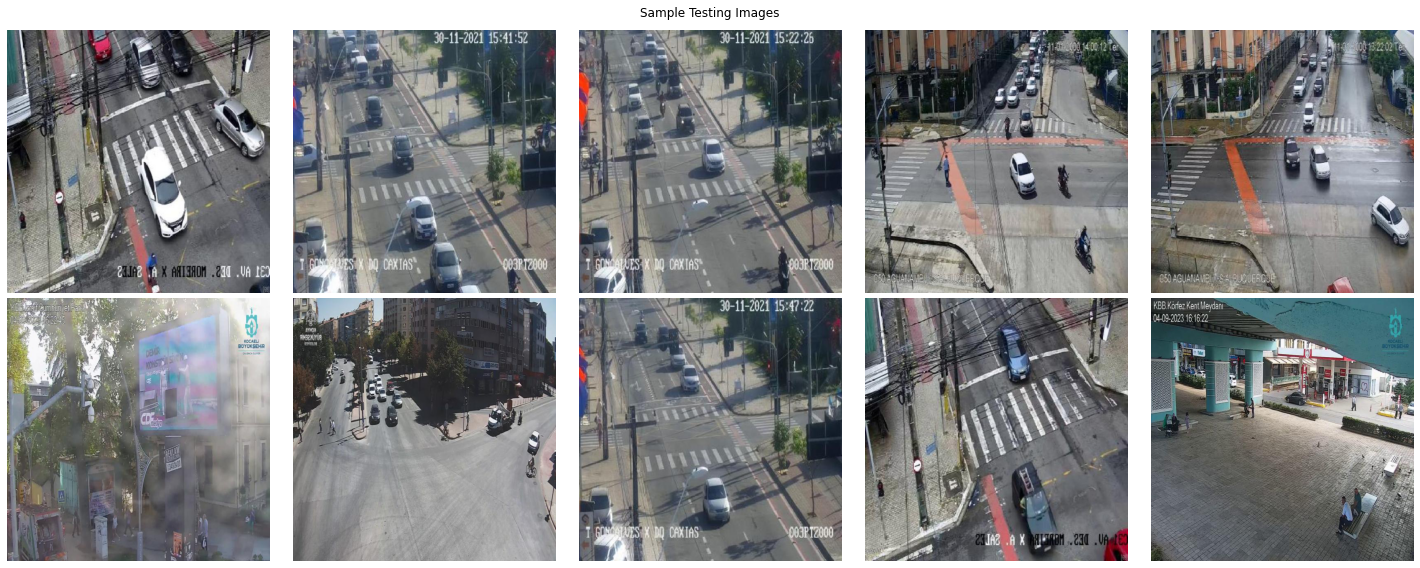

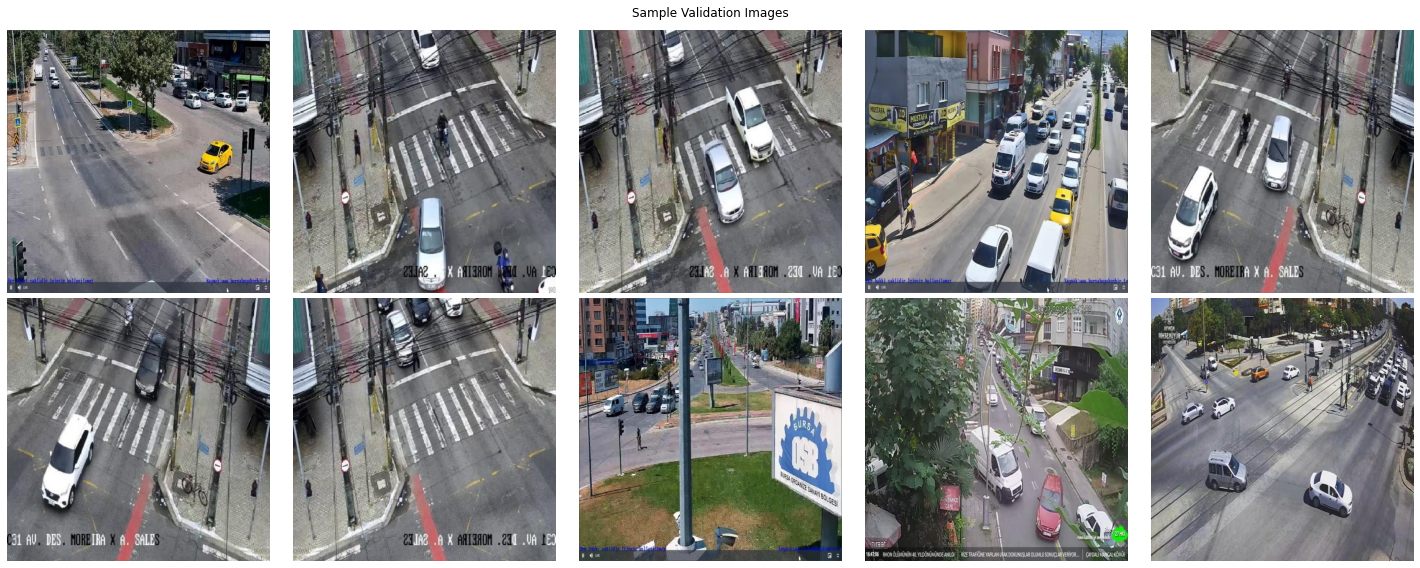

In [7]:
# Now use the function to plot grids of 10 images from each set
plot_image_grid(train_images, 'Sample Training Images')
plot_image_grid(test_images, 'Sample Testing Images')
plot_image_grid(validation_images, 'Sample Validation Images')

In [10]:
#Getting image size
def check_image_dimensions(images):
    if not images:  # Check if the list is empty
        return None
    
    first_image_width, first_image_height = images[0].size
    all_same_size = all(img.size == (first_image_width, first_image_height) for img in images)
    
    if all_same_size:
        return first_image_width, first_image_height
    else:
        return None

# Example usage:
train_dimensions = check_image_dimensions(train_images)
test_dimensions = check_image_dimensions(test_images)
validation_dimensions = check_image_dimensions(validation_images)

# Print the results
if train_dimensions:
    print(f"All training images have the same dimensions: {train_dimensions}")
else:
    print("Training images have varying dimensions.")

if test_dimensions:
    print(f"All testing images have the same dimensions: {test_dimensions}")
else:
    print("Testing images have varying dimensions.")

if validation_dimensions:
    print(f"All validation images have the same dimensions: {validation_dimensions}")
else:
    print("Validation images have varying dimensions.")


All training images have the same dimensions: (640, 640)
All testing images have the same dimensions: (640, 640)
All validation images have the same dimensions: (640, 640)


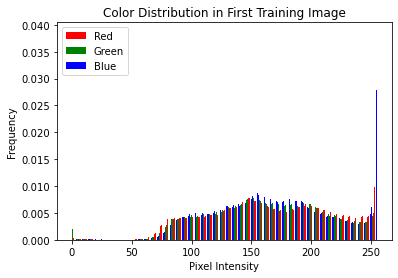

In [8]:
# Analyze color distribution of the first image in the training set
first_image = train_images[0]
color_data = np.array(first_image).reshape(-1, 3)
plt.hist(color_data, bins=256, density=True, color=['red', 'green', 'blue'], label=['Red', 'Green', 'Blue'])
plt.title('Color Distribution in First Training Image')
plt.legend()
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()